In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

/tmp/ipykernel_45913/3418534756.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data.csv')
df = df.dropna()  # VRTX has null PX_LAST in 2015-05-12
df.head()

,Date,PX_LAST,CUR_MKT_CAP,PX_VOLUME,Ticker,Market_Value
0,2014-01-02,76.27,134027.7199,5212460.0,DIS,1.022229e+07
1,2014-01-03,76.11,133746.5552,4061042.0,DIS,1.017945e+07
2,2014-01-06,75.82,133236.9441,6816693.0,DIS,1.010203e+07
3,2014-01-07,76.34,134150.7295,4511157.0,DIS,1.024107e+07
4,2014-01-08,75.22,132182.5763,10914858.0,DIS,9.942773e+06


In [3]:
tickers = df['Ticker'].unique()
tickers

array(['DIS', 'UHS', 'GOOGL', 'LOW', 'BSX', 'JPM', 'EOG', 'SBAC', 'STT',
       'DVN', 'VRTX', 'BK', 'ALL', 'WY', 'OXY', 'ON', 'EXC', 'UAL',
       'AKAM', 'SMCI', 'LYV', 'AMD', 'VLO', 'NI', 'DRI', 'SJM', 'APH',
       'MAS', 'CMG', 'TXT'], dtype=object)

In [4]:
n = random.randint(1, len(tickers))
n

14

In [5]:
random_tickers = random.sample(list(tickers), n)
random_tickers

['UAL',
 'CMG',
 'VRTX',
 'OXY',
 'EOG',
 'NI',
 'SBAC',
 'BSX',
 'ON',
 'APH',
 'ALL',
 'AMD',
 'LYV',
 'LOW']

In [6]:
def compute_ex_post_returns(df: pd.DataFrame, tickers: list) -> pd.DataFrame:
    selected_data = df[df['Ticker'].isin(tickers)].copy()
    selected_data['Return'] = selected_data.groupby('Ticker')['PX_LAST'].pct_change()  # Daily percentual returns
    selected_data = selected_data.dropna(subset=['Return'])
    ex_post_returns = selected_data.groupby('Date')['Return'].mean()  # Ex-post returns on an equal-weighted portfolio
    
    return pd.DataFrame(ex_post_returns).reset_index()

In [7]:
ex_post_returns = compute_ex_post_returns(df, random_tickers)
ex_post_returns

,Date,Return
0,2014-01-03,0.005976
1,2014-01-06,0.004623
2,2014-01-07,0.006212
3,2014-01-08,0.011575
4,2014-01-09,0.005095
...,...,...
2510,2023-12-22,0.004192
2511,2023-12-26,0.007517
2512,2023-12-27,0.000341
2513,2023-12-28,0.000658


In [8]:
def compute_portfolio_variance(ex_post_returns: pd.DataFrame) -> float:
    return ex_post_returns['Return'].var()

In [9]:
portfolio_variance = compute_portfolio_variance(ex_post_returns)
portfolio_variance

0.00019225620132838528

In [10]:
# Repeat the process 10 times
def simulate_portfolio_variances(df: pd.DataFrame, n: int, repetitions: int = 10) -> list:
    portfolio_variances = []
    for _ in range(repetitions):
        random_tickers = random.sample(list(tickers), n)
        ex_post_returns = compute_ex_post_returns(df, random_tickers)
        portfolio_variance = compute_portfolio_variance(ex_post_returns)
        portfolio_variances.append(portfolio_variance)
    return portfolio_variances

In [11]:
portfolio_variances = simulate_portfolio_variances(df, n)
portfolio_variances

[0.00021149418346264352,
 0.00021717439826451646,
 0.00017276548929236882,
 0.00018415768477194903,
 0.00018516277308277957,
 0.00017057644589981937,
 0.0001640127781313774,
 0.00021052071939719856,
 0.00018922167632673073,
 0.00017267490545755512]

In [12]:
# Repeat for n = 1, 2, ..., 30
def simulate_variances_accross_portfolio_sizes(df: pd.DataFrame, max_n: int, repetitions: int = 10) -> dict:
    all_variances = {}
    
    for n in range(1, max_n + 1):
        variances = simulate_portfolio_variances(df, n, repetitions)
        all_variances[n] = variances
        
    return all_variances

In [13]:
all_variances = simulate_variances_accross_portfolio_sizes(df, len(tickers))
pd.DataFrame(all_variances)

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.000216,0.000248,0.000252,0.000254,0.000201,0.000222,0.000159,0.000181,0.000162,0.000207,...,0.000193,0.000178,0.000188,0.000175,0.000173,0.000175,0.000178,0.000175,0.000171,0.000176
1,0.000282,0.000221,0.000206,0.000290,0.000269,0.000304,0.000200,0.000210,0.000264,0.000195,...,0.000184,0.000170,0.000194,0.000181,0.000185,0.000178,0.000186,0.000175,0.000177,0.000176
2,0.000282,0.000227,0.000367,0.000204,0.000284,0.000208,0.000172,0.000177,0.000234,0.000195,...,0.000175,0.000159,0.000189,0.000191,0.000174,0.000191,0.000171,0.000172,0.000180,0.000176
3,0.000492,0.000639,0.000244,0.000323,0.000151,0.000305,0.000218,0.000189,0.000253,0.000178,...,0.000174,0.000187,0.000184,0.000186,0.000167,0.000202,0.000186,0.000175,0.000173,0.000176
4,0.000650,0.000213,0.000258,0.000143,0.000212,0.000251,0.000205,0.000226,0.000239,0.000213,...,0.000195,0.000186,0.000187,0.000180,0.000178,0.000172,0.000182,0.000177,0.000176,0.000176
5,0.000391,0.000438,0.000302,0.000285,0.000144,0.000234,0.000141,0.000195,0.000171,0.000232,...,0.000195,0.000190,0.000168,0.000191,0.000180,0.000170,0.000178,0.000181,0.000181,0.000176
6,0.001340,0.000204,0.000446,0.000221,0.000166,0.000149,0.000194,0.000161,0.000183,0.000191,...,0.000146,0.000155,0.000181,0.000194,0.000193,0.000176,0.000169,0.000182,0.000174,0.000176
7,0.000492,0.000524,0.000249,0.000175,0.000295,0.000230,0.000203,0.000183,0.000209,0.000167,...,0.000183,0.000168,0.000185,0.000190,0.000176,0.000188,0.000177,0.000178,0.000181,0.000176
8,0.000222,0.000261,0.000371,0.000157,0.000157,0.000197,0.000205,0.000181,0.000285,0.000182,...,0.000184,0.000169,0.000183,0.000187,0.000176,0.000168,0.000173,0.000187,0.000180,0.000176
9,0.000568,0.000274,0.000306,0.000255,0.000192,0.000255,0.000238,0.000190,0.000246,0.000208,...,0.000161,0.000194,0.000187,0.000167,0.000171,0.000190,0.000173,0.000179,0.000180,0.000176


In [14]:
x = []
y = []

for key, values in all_variances.items():
    x.extend([key] * len(values))
    y.extend(values)

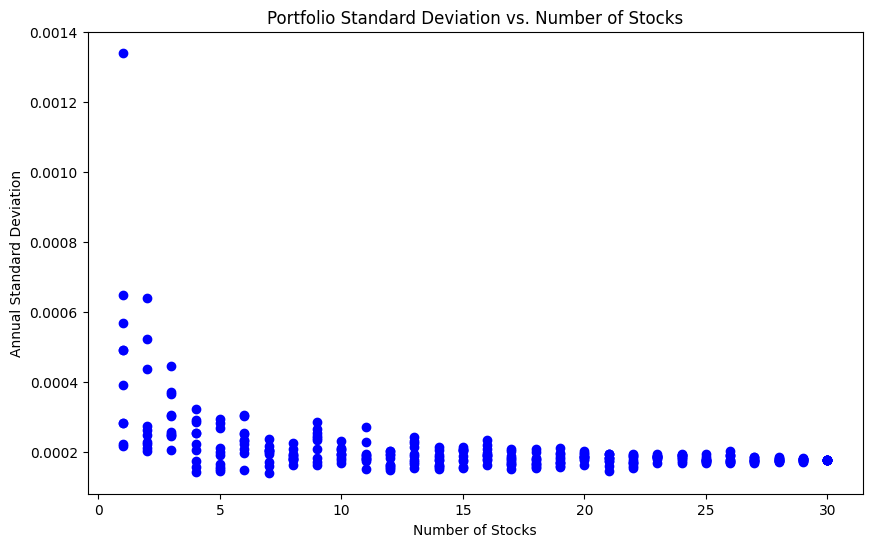

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Number of Stocks')
plt.ylabel('Annual Standard Deviation')
plt.title('Portfolio Standard Deviation vs. Number of Stocks')
plt.show()